## This lab is focus on map projections and basic spatial data operation

Last week we talked about the maps as models, generalization, and scales of map. This week is about two other important concepts in map design, coordinate system and projection. The lab of this week is about read shapefiles in geopandas and create maps of different projections. 

### Recap:
- using anaconda to create virtual environment, `conda create -n geoviz python=3.7`
- activate one virtual environment, `conda activate geoviz`
- using conda to install Python moduels, ```conda install geopandas```
- Python basics, `variable`, `data type`, `loop`, `flow control`, `list`, `function`, `matplotlib.pyplot`

### This week

- Read the traffic accidents map of Philadelphia using Python, `geopandas`
- Plot the number of traffic accidents in different years, months, and days, `groupby()`
- Plot maps of different projections, `cartopy`

### Homework
- plot the traffic accidents map of days, with title, using line color of red
- plot the location of Phily, Boston, LA, SF on a map of global projection


### 1. Read the shapefile of traffic accident in Philadelphia from 2011 to 2018
Using the `geopandas` to read the shapefile and do basic analysis of the traffic accidents in different years, months, and days.

Read the shapefile

In [1]:
import geopandas as gpd

# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("data/crash_data_collision_crash_2007_2017.shp")


Let see what we have read

In [4]:
accident

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96689999993436 40.08220000023073)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19459999988942 39.97510000036561)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21709999966458 40.03569999985604)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210000011426 39.95109999976609)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77457,None,77458,859429,2012004815,6,67,67301,2011,12,5,...,0,0,0,0,0,39.9849,-75.2368,None,None,POINT (-75.23679999981948 39.98489999993598)
77458,None,77459,859451,2011115410,6,67,67301,2011,10,6,...,0,0,0,8,0,40.0270,-75.0654,None,None,POINT (-75.06539999980947 40.02699999975107)
77459,None,77460,859453,2011118190,6,67,67301,2011,10,3,...,0,0,0,8,1,40.0021,-75.1678,None,None,POINT (-75.16779999966957 40.00209999991597)
77460,None,77461,859454,2011118469,6,67,67301,2011,10,5,...,1,0,0,8,0,40.0154,-75.0679,None,None,POINT (-75.06789999998432 40.01539999991098)


Let print the first five rows of the data frame

In [5]:
# print the first five rows of a data frame
accident.head()


,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05769999995437 40.06280000042057)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96689999993436 40.08220000023073)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19459999988942 39.97510000036561)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21709999966458 40.03569999985604)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210000011426 39.95109999976609)


print the columns of the dataframe

In [6]:
accident.columns

Index(['county_nam', 'objectid_1', 'objectid', 'crn', 'district', 'county',
       'municipali', 'crash_year', 'crash_mont', 'day_of_wee', 'time_of_da',
       'hour_of_da', 'illuminati', 'weather', 'road_condi', 'collision_',
       'relation_t', 'work_zone_', 'work_zon_1', 'work_zon_2', 'intersect_',
       'tcd_type', 'location_t', 'urban_rura', 'fatal_coun', 'injury_cou',
       'person_cou', 'total_unit', 'sch_bus_in', 'sch_zone_i', 'latitude',
       'longitude', 'arrival_tm', 'cons_zone_', 'dispatch_t', 'est_hrs_cl',
       'lane_close', 'ln_close_d', 'ntfy_hiwy_', 'spec_juris', 'tcd_func_c',
       'tfc_detour', 'workers_pr', 'wz_close_d', 'wz_flagger', 'wz_ln_clos',
       'wz_moving', 'wz_other', 'wz_shlder_', 'vehicle_co', 'automobile',
       'motorcycle', 'bus_count', 'small_truc', 'heavy_truc', 'suv_count',
       'van_count', 'bicycle_co', 'maj_inj_co', 'mod_inj_co', 'min_inj_co',
       'tot_inj_co', 'unk_inj_de', 'unk_inj_pe', 'driver_cou', 'driver_c_1',
       'driver

In [7]:
year_crash = accident.groupby('crash_year').size()
month_crash = accident.groupby('crash_mont').size()
# week_crash = accident.groupby('week').size()
# hour_crash = accident.groupby('hour').size()
print('The year crash is', year_crash)
print('The month crash is', month_crash)

The year crash is crash_year
2011     9941
2012    11281
2013    11072
2014    10565
2015    11453
2016    12137
2017    11013
dtype: int64
The month crash is crash_mont
1     5695
2     5444
3     6401
4     6763
5     7218
6     6829
7     6109
8     6645
9     6526
10    6931
11    6510
12    6391
dtype: int64


Plot the traffic accidents from 2011 to 2017, using the red color and `.` for each point and `-` to connect each point, using `markersize` to set the size of the point

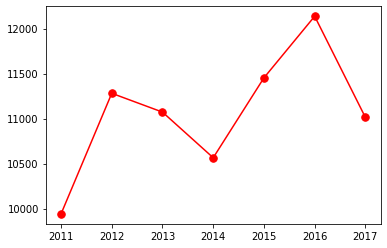

In [13]:
from matplotlib import pyplot as plt

plt.plot(year_crash, 'r.-', markersize=15)
plt.show()


Plot the locations of the traffic accidents. Your first geovisualization in the class!

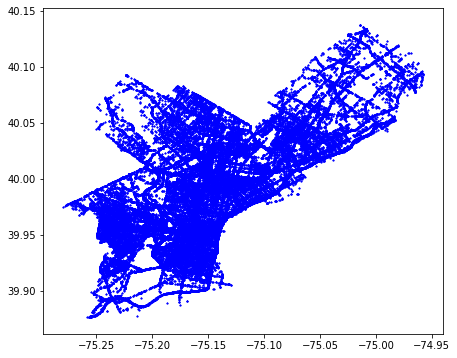

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

accident.plot(marker='*', ax=ax, color='blue', markersize=2)


### 2. Map Projections 
Plot the globe using different projection - Using cartopy. You can also use `Basemap`, however, `Basemap` will not be supported in future, therefore, we focus on the active module `cartopy`. In future, you can even develop your own modules based on `Matplotlib`. Actually, many open sourced modules were developed based on a teaching project or even final project.   

Plot the global map of Sinusoidal projection

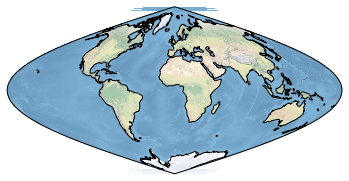

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# ax = plt.axes(projection=ccrs.epsg(2275)) # for epsg https://spatialreference.org/ref/epsg/?search=Penn&srtext=Search
ax = plt.axes(projection=ccrs.Sinusoidal()) # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
# plt.savefig('coastlines.pdf')
# plt.savefig('coastlines.png')

ax.stock_img()
plt.show()


#### Plot lines on different projection
We can plot the lines that connect different places in different projections. Here we will see the lines between New York City and Singapore in Geodetic and PlateCarree. 

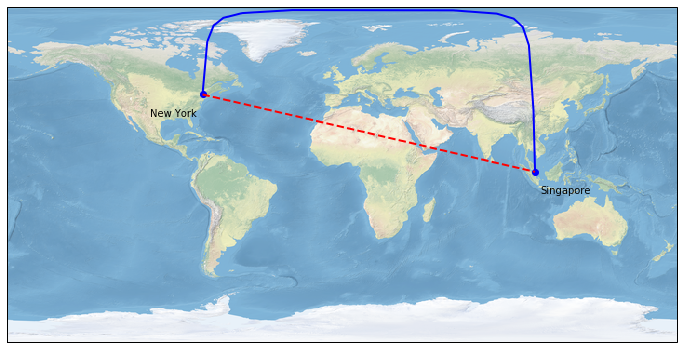

In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
sg_lon, sg_lat = 103.799321, 1.365707

plt.plot([ny_lon, sg_lon], [ny_lat, sg_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, sg_lon], [ny_lat, sg_lat],
         color='red', linewidth=2, linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(sg_lon + 3, sg_lat - 12, 'Singapore',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()


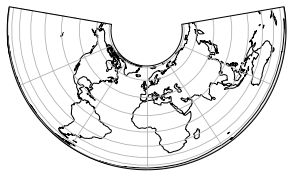

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(5.1299, 3))
ax = plt.axes(projection=ccrs.AlbersEqualArea())
ax.coastlines(resolution='110m')
ax.gridlines()

#### Tissot example of different projections

PlateCarree projection

//anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x144ab3350> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


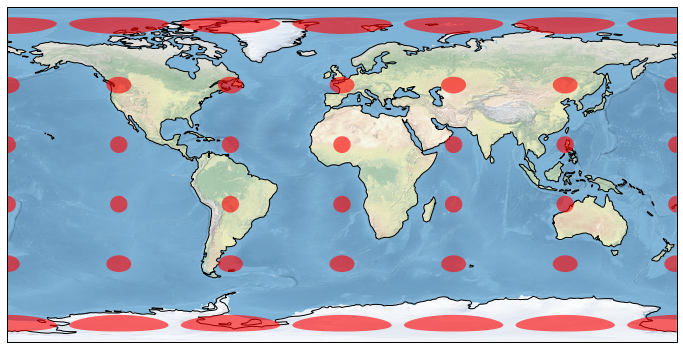

In [21]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree()) # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html

# make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='red', alpha=0.6)
plt.show()


Mercator projection

//anaconda3/envs/geospatial/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x144a5c4d0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


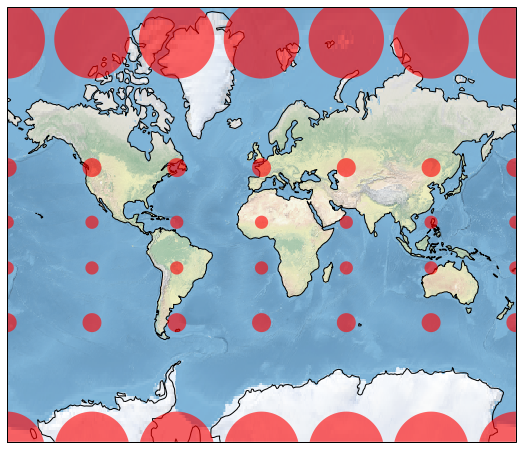

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Mercator()) # for other projections: https://scitools.org.uk/cartopy/docs/v0.15/cartopy_outline.html

# make the map global rather than have it zoom in to the extents of any plotted data
ax.set_global()

ax.stock_img()
ax.coastlines()

ax.tissot(facecolor='red', alpha=0.6)
plt.show()


## Plot regional maps with different projections
Rather than forcus on the global map, let focus on any specific region by setting the extent of the map under different projections

#### Map of Africa, set_extent([lon_lower, lon_upper, lat_lower, lat_upper])

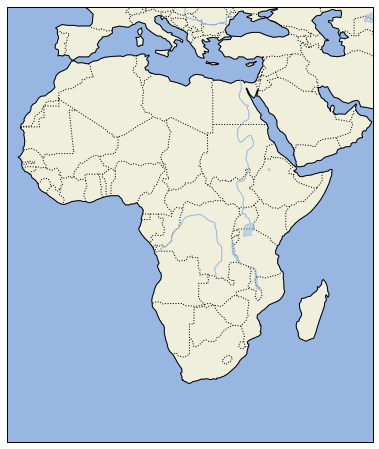

In [24]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper]
ax.set_extent([-20, 60, -40, 40])

plt.show()

#### Map of America, set_extent([lon_lower, lon_upper, lat_lower, lat_upper])

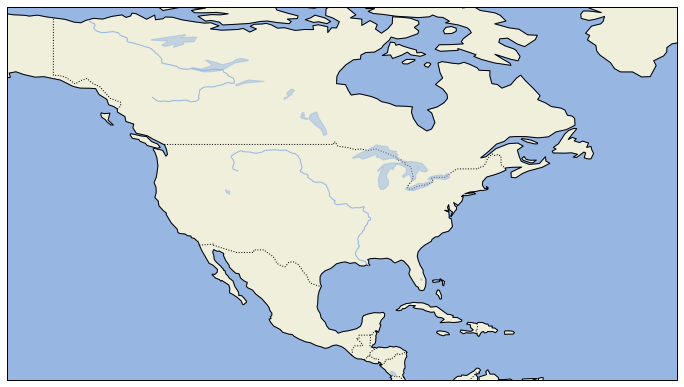

In [8]:
import cartopy
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=cartopy.crs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper]
ax.set_extent([-148.544271, -39.045398, 10.515164, 60.016220])

plt.show()


#### Let's have Philadelphia marked on the map
You can find the projections from here, https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#albersequalarea

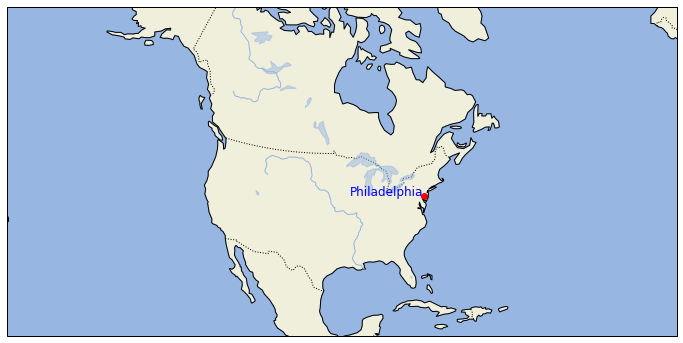

In [28]:

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree()) # you can use other projection, https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html#albersequalarea

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper] of America
ax.set_extent([-148.544271, -39.045398, 10.515164, 60.016220])

lon_phily = -75.157227
lat_phily = 39.980076
plt.scatter([lon_phily], [lat_phily], transform=ccrs.Geodetic(), color='red')
plt.text(lon_phily, lat_phily, 'Philadelphia', 
         fontsize=12, 
         horizontalalignment='right',
         color='Blue',
         transform=ccrs.Geodetic())
plt.show()


#### Let put both Philadelphia and LA on the global map

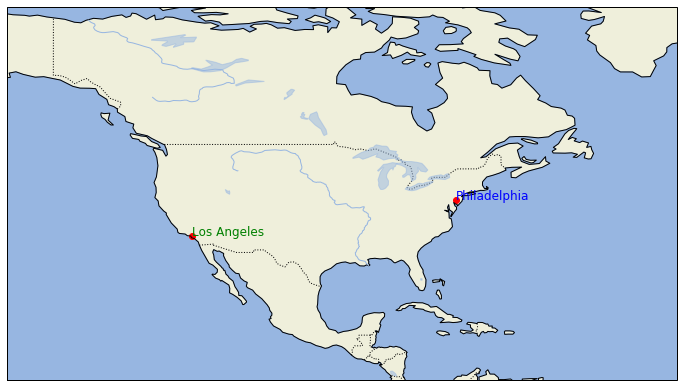

In [15]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

# [lon_lower, lon_upper, lat_lower, lat_upper] of America
ax.set_extent([-148.544271, -39.045398, 10.515164, 60.016220])

lon_phily = -75.157227
lat_phily = 39.980076
lon_LA = -118.321113
lat_LA = 34.083629

plt.scatter([lon_phily, lon_LA], [lat_phily, lat_LA], transform=ccrs.Geodetic(), color='red')
plt.text(lon_phily, lat_phily, 'Philadelphia', 
         fontsize=12, 
         horizontalalignment='left',
         color='Blue',
         transform=ccrs.Geodetic())

plt.text(lon_LA, lat_LA, 'Los Angeles', 
         fontsize=12, 
         horizontalalignment='left',
         color='Green',
         transform=ccrs.Geodetic())

plt.show()


## Homework: 
- Plot city of Los Angeles, Philadelphia, Seattle and Miami to the map, (Hint: Check the coordinates from Google Maps). Make sure to use LambertConformal projection. 
- Put the city name of each city on the map and use different colors for different cities.

- Plot the route from Seattle to Miami on the Map using geodic 